In [1]:
import numpy as np
import pims
from pims.bioformats import BioformatsReader
import skimage as ski
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
class IndexMaker:
    def __init__(self,reader):
        self.sizes = reader.sizes
    def to_index(self,t,z):
        return self.sizes['z'] * t + z

In [24]:
image_source = ('/Users/akennard/Analysis/2018-05-02_3dpf_bact2EGFPCAAX/'
                '20180502_63x_2xopt_Wounding_2/'
                '20180502_63x_2xopt_Wounding_2_Subimage_downsampled.tif')
images = BioformatsReader(image_source)
images.bundle_axes = 'zyx'
images.iter_axes = 't'

/Users/akennard/.virtualenvs/myenv/lib/python3.6/site-packages/pims/bioformats.py:386: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


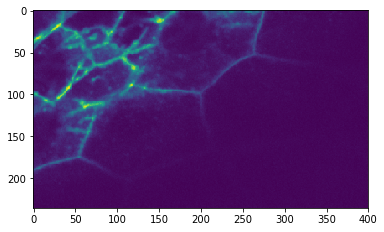

In [20]:
t = 5
z = 40
k = images.sizes['z'] * t + z
K = IndexMaker(images)
plt.imshow(images[K.to_index(t,z)])

In [25]:
t = 5
z = 40
im_0 = images[5]
im_1 = images[6]

(3, 236, 400)
55.656652745024616
83611563.0


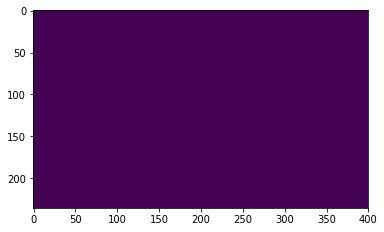

In [75]:
xx = im_0[:3,...]
f0 = np.fft.fft2(xx)
print(f0.shape)
print(np.min(abs(f0)))
print(np.max(abs(f0)))
plt.imshow(abs(f0[0,...]))

2862


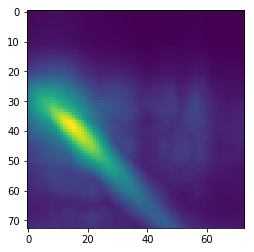

In [56]:
max_correlation = np.zeros((im_0.shape[0],im_1.shape[0]))
f0 = np.
for i in range(im_0.shape[0]):
    for j in range(im_1.shape[0]):
        im_product = np.fft.fft2(im_0[i,...]/np.mean(im_0[i,...])) * np.fft.fft2(im_1[j,...]/np.mean(im_1[j,...])).conj()
        cc_image = np.fft.fftshift(np.fft.ifft2(im_product))
        max_correlation[i,j] = np.max(cc_image.real)
plt.imshow(max_correlation)
print(np.argmax(max_correlation))

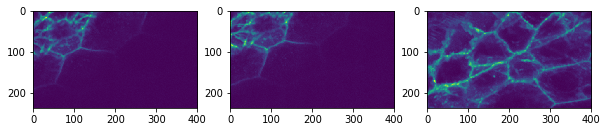

In [76]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,18))
ax[0].imshow(im_0[35,...])
ax[1].imshow(im_1[10,...])
ax[2].imshow(im_1[35,...])

In [47]:
?plt.subplots

In [62]:
from skimage.transform import (hough_line,hough_line_peaks)
h,theta,d = hough_line(max_correlation)
hough_line_peaks(h,theta,d)

(array([119, 118, 106, 106, 105, 101,  83,  83,  83,  83,  83,  83,  76],
       dtype=uint64),
 array([ 0.78101046, -0.78101046,  0.46509612, -0.46509612, -0.46509612,
         0.46509612,  1.32508517,  1.32508517,  1.32508517, -1.32508517,
        -1.32508517, -1.32508517, -0.09652938]),
 array([ 52.75362319,   2.51207729,  51.74879227,  12.56038647,
         29.64251208,  34.66666667,  57.77777778,  41.70048309,
         25.62318841,  -6.53140097, -22.60869565, -47.7294686 ,
         65.81642512]))

(73, 0)

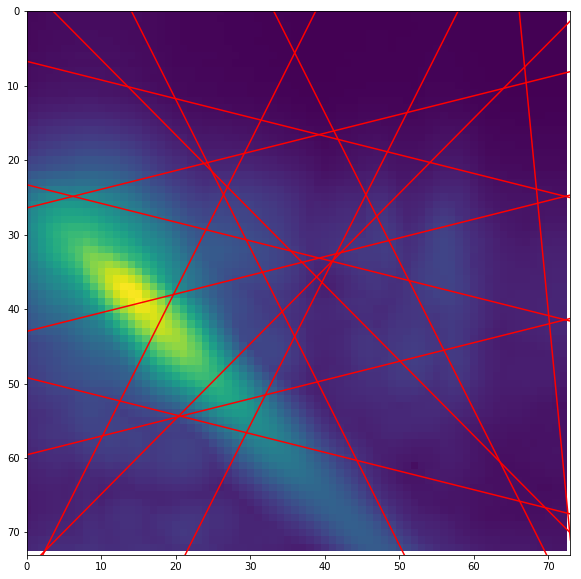

In [65]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(max_correlation)
for _, angle, dist in zip(*hough_line_peaks(h,theta,d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - 73 * np.cos(angle)) / np.sin(angle)
    ax.plot((0,73),(y0,y1),'-r')
ax.set_xlim((0,73))
ax.set_ylim((73,0))